In [1]:
import numpy as np
import pandas as pd
from collections import Counter

In [2]:
mri_csv = pd.read_csv('archive/oasis_longitudinal.csv')
mri_csv['Group'].replace('Converted', 'Demented', inplace=True)

In [3]:
mri_csv.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [4]:
mri_csv = mri_csv.fillna(mri_csv.mean())
mri_csv

/var/folders/25/hkg7hrfn7130z9vkbc1z1h580000gn/T/ipykernel_8296/2516103592.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mri_csv = mri_csv.fillna(mri_csv.mean())


,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,2.460452,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.000000,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.000000,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.000000,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.000000,30.0,0.0,1327,0.796,1.323


In [5]:
mri_csv.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.104665,3.673329,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [6]:
mri_csv.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,2.460452,22.0,0.5,1698,0.701,1.034


In [14]:
def count_all_ig(X, y):
    n_samples, n_feats = X.shape

    feat_idxs = np.random.choice(n_feats, n_feats, replace=False)
    n_labels = len(np.unique(y))
    best_gains = []
    for feat_idx in feat_idxs:
        column = X.columns[feat_idx]
        col = X[column]
        # col = X[:,feat_idx]
        best_ig = -1
        thresholds = np.unique(col)

        for thr in thresholds:
            gain = information_gain(y, col.values, thr)
            best_ig = max(best_ig, gain)

        best_gains.append((best_ig, column))
    return best_gains


# entropy(parent) - [weighted entropy](children)
def information_gain(y, col, thr):
    parent_entropy = entropy(y)
    l_idxs, r_idxs = create_children(col, thr)

    if len(l_idxs) == 0 or len(r_idxs) == 0:
        return 0

    # calculate the weighted avg. entropy of children
    n = len(y)
    n_l, n_r = len(l_idxs), len(r_idxs)
    e_l, e_r = entropy(y[l_idxs]), entropy(y[r_idxs])
    child_entropy = (n_l/n) * e_l + (n_r/n) * e_r

    # calculate the IG
    information_gain = parent_entropy - child_entropy
    return information_gain


def entropy(y):
    hist = np.bincount(y)
    ps = hist / len(y)
    return -np.sum([p * np.log(p) for p in ps if p > 0])


def create_children(col, thr):
    left_idxs = np.argwhere(col <= thr).flatten()
    right_idxs = np.argwhere(col > thr).flatten()
    return left_idxs, right_idxs

In [8]:
from sklearn import preprocessing

In [9]:
y = mri_csv['Group']
le_y = preprocessing.LabelEncoder()
le_y.fit(y)
y = le_y.transform(y)
y[0:10]

array([1, 1, 0, 0, 0, 1, 1, 1, 1, 1])

In [10]:
X = mri_csv.iloc[:, 3:]
le_X = preprocessing.LabelEncoder()
le_X.fit(X['M/F'])
X['M/F'] = le_X.transform(X['M/F'])
X.drop('Hand', inplace=True, axis=1)
# le_X.fit(X['Hand'])
# X['Hand'] = le_X.transform(X['Hand'])
# columns = X.columns
X.head()


,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,1,0,1,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,2,457,1,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,1,0,1,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,2,560,1,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,3,1895,1,80,12,2.460452,22.0,0.5,1698,0.701,1.034


In [41]:
scaler = preprocessing.StandardScaler()
scaler.fit(X)

X = scaler.transform(X)
X

array([[-0.95706686, -0.93771494,  1.15379808, ...,  2.83605891,
        -0.90516867, -2.2657425 ],
       [ 0.12799678, -0.21761337,  1.15379808, ...,  2.93270307,
        -1.30964265, -2.31650145],
       [-0.95706686, -0.93771494,  1.15379808, ...,  1.07940909,
         0.17342861, -1.08378418],
       ...,
       [-0.95706686, -0.93771494, -0.86670278, ..., -0.96148827,
         1.92614919,  0.98283006],
       [ 0.12799678,  0.2645553 , -0.86670278, ..., -0.91600866,
         1.79132453,  0.92481984],
       [ 1.21306043,  1.59603414, -0.86670278, ..., -0.88189896,
         1.92614919,  0.88131217]])

In [15]:
res = count_all_ig(X, y)
res.sort(reverse=True)
res

[(0.50020330190696, 'CDR'),
 (0.2025787673416347, 'MMSE'),
 (0.056628047080982125, 'nWBV'),
 (0.0248786896958213, 'M/F'),
 (0.021441306602358434, 'EDUC'),
 (0.013661024224292051, 'MR Delay'),
 (0.012501246552879097, 'SES'),
 (0.010020060223292826, 'eTIV'),
 (0.010020060223292826, 'ASF'),
 (0.006180733341473399, 'Age'),
 (0.005222284490174367, 'Visit')]

In [16]:
sum(el[0] for el in res)

0.8633355216831612

In [17]:
n = len(res)
top_features = {}
for perc in np.linspace(0.2, 1.0, num=9):
    top_features[perc] =list([feature[1] for feature in res[0:int(n * perc)]])
top_features

{0.2: ['CDR', 'MMSE'],
 0.30000000000000004: ['CDR', 'MMSE', 'nWBV'],
 0.4: ['CDR', 'MMSE', 'nWBV', 'M/F'],
 0.5: ['CDR', 'MMSE', 'nWBV', 'M/F', 'EDUC'],
 0.6000000000000001: ['CDR', 'MMSE', 'nWBV', 'M/F', 'EDUC', 'MR Delay'],
 0.7: ['CDR', 'MMSE', 'nWBV', 'M/F', 'EDUC', 'MR Delay', 'SES'],
 0.8: ['CDR', 'MMSE', 'nWBV', 'M/F', 'EDUC', 'MR Delay', 'SES', 'eTIV'],
 0.9000000000000001: ['CDR',
  'MMSE',
  'nWBV',
  'M/F',
  'EDUC',
  'MR Delay',
  'SES',
  'eTIV',
  'ASF'],
 1.0: ['CDR',
  'MMSE',
  'nWBV',
  'M/F',
  'EDUC',
  'MR Delay',
  'SES',
  'eTIV',
  'ASF',
  'Age',
  'Visit']}

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score
from sklearn.model_selection import cross_validate
scoring = ['precision_macro', 'recall_macro', 'f1_macro', 'accuracy', 'roc_auc']


def algorithms_by_information_gain(alg, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=True)
    clf = alg.fit(X_train, y_train)

    scores = cross_validate(clf, X, y, scoring=scoring)

    df = pd.DataFrame(data=[scores['test_accuracy'].mean(), scores['test_recall_macro'].mean(),
                    scores['test_precision_macro'].mean(), scores['test_roc_auc'].mean(), scores['test_f1_macro'].mean()],
                index=["accuracy", "recall", "precision", "roc_auc_score", "f1"])

    return df

In [57]:
algorithms = {}

In [54]:
import sklearn.metrics as mt

mt.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

NAIVE BAYES

In [67]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
df_nb = pd.DataFrame()
for percent in top_features:
    features = top_features[percent]
    df_nb[percent] = algorithms_by_information_gain(gnb, X[features], y)
algorithms['Naive Bayes'] = df_nb
print(df_nb)

                    0.2       0.3       0.4       0.5       0.6       0.7  \
accuracy       0.946378  0.946378  0.946378  0.946378  0.946378  0.946378   
recall         0.945634  0.945634  0.945634  0.945634  0.945634  0.945634   
precision      0.949992  0.949992  0.949992  0.949992  0.949992  0.949992   
roc_auc_score  0.949729  0.957859  0.955627  0.954647  0.963067  0.961526   
f1             0.946158  0.946158  0.946158  0.946158  0.946158  0.946158   

                    0.8       0.9       1.0  
accuracy       0.946378  0.946378  0.946378  
recall         0.945634  0.945634  0.945634  
precision      0.949992  0.949992  0.949992  
roc_auc_score  0.960388  0.959677  0.960234  
f1             0.946158  0.946158  0.946158  


DECISION TREE

In [68]:
from sklearn import tree


clf = tree.DecisionTreeClassifier()
df_dt = pd.DataFrame()
for percent in top_features:
    features = top_features[percent]
    df_dt[percent] = algorithms_by_information_gain(clf, X[features], y)
algorithms['Decision Tree'] = df_dt
print(df_dt)

                    0.2       0.3       0.4       0.5       0.6       0.7  \
accuracy       0.943676  0.900721  0.884721  0.863243  0.892721  0.860577   
recall         0.942856  0.900826  0.884965  0.863838  0.892927  0.861277   
precision      0.947984  0.903264  0.887400  0.865936  0.893508  0.865912   
roc_auc_score  0.931328  0.915167  0.899093  0.863838  0.892927  0.861277   
f1             0.943386  0.900525  0.884541  0.863063  0.892658  0.859981   

                    0.8       0.9       1.0  
accuracy       0.868505  0.852360  0.852468  
recall         0.868658  0.852869  0.852869  
precision      0.871645  0.855654  0.856116  
roc_auc_score  0.868658  0.852869  0.852869  
f1             0.868144  0.852073  0.852115  


RANDOM FOREST

In [72]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)

df_rf = pd.DataFrame()
for percent in top_features:
    features = top_features[percent]
    df_rf[percent] = algorithms_by_information_gain(clf, X[features], y)
algorithms['Random Forest'] = df_rf
df_rf

,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
accuracy,0.943676,0.943676,0.946378,0.946378,0.938342,0.943712,0.943712,0.946378,0.946378
recall,0.942856,0.942856,0.945488,0.945488,0.937593,0.942856,0.942856,0.945488,0.945488
precision,0.947984,0.947984,0.950969,0.950969,0.942130,0.947975,0.947975,0.950969,0.950969
roc_auc_score,0.949137,0.957851,0.957567,0.954732,0.961566,0.961648,0.959274,0.957409,0.958918
f1,0.943386,0.943386,0.946086,0.946086,0.938089,0.943439,0.943439,0.946086,0.946086


SVM

In [73]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
df_svm = pd.DataFrame()
for percent in top_features:
    features = top_features[percent]
    df_svm[percent] = algorithms_by_information_gain(clf, X[features], y)
algorithms['SVM'] = df_svm
df_svm

,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
accuracy,0.946378,0.946378,0.946378,0.946378,0.946378,0.946378,0.946378,0.946378,0.946378
recall,0.945488,0.945488,0.945488,0.945488,0.945488,0.945488,0.945488,0.945488,0.945488
precision,0.950969,0.950969,0.950969,0.950969,0.950969,0.950969,0.950969,0.950969,0.950969
roc_auc_score,0.944770,0.949150,0.944132,0.931666,0.941651,0.952292,0.955247,0.955662,0.953367
f1,0.946086,0.946086,0.946086,0.946086,0.946086,0.946086,0.946086,0.946086,0.946086


AdaBoost

In [76]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100, random_state=0)

df_ada = pd.DataFrame()
for percent in top_features:
    features = top_features[percent]
    df_ada[percent] = algorithms_by_information_gain(clf, X[features], y)
algorithms['AdaBoost'] = df_ada
df_ada

,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
accuracy,0.946378,0.919604,0.919604,0.916865,0.898162,0.903423,0.906054,0.906054,0.889874
recall,0.945634,0.919318,0.919318,0.916686,0.898119,0.903453,0.905425,0.905425,0.889565
precision,0.949992,0.921710,0.921710,0.917084,0.898587,0.904002,0.908796,0.908796,0.890495
roc_auc_score,0.943210,0.937046,0.934560,0.926490,0.937186,0.935890,0.941062,0.941062,0.938707
f1,0.946158,0.919468,0.919468,0.916788,0.898096,0.903348,0.905689,0.905689,0.889682


Logistic Regression

In [79]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=123)
df_lr = pd.DataFrame()
for percent in top_features:
    features = top_features[percent]
    df_lr[percent] = algorithms_by_information_gain(clf, X[features], y)
algorithms['Logistic Regression'] = df_lr
df_lr

/Users/eldarst/PycharmProjects/VKR/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/eldarst/PycharmProjects/VKR/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
accuracy,0.949081,0.949081,0.949081,0.949081,0.946378,0.943712,0.946378,0.946378,0.911640
recall,0.948265,0.948265,0.948265,0.948265,0.945488,0.942856,0.945488,0.945488,0.910700
precision,0.952978,0.952978,0.952978,0.952978,0.950969,0.947975,0.950969,0.950969,0.917237
roc_auc_score,0.950555,0.954880,0.953900,0.952153,0.962308,0.961419,0.966260,0.970962,0.949423
f1,0.948859,0.948859,0.948859,0.948859,0.946086,0.943439,0.946086,0.946086,0.911167


In [80]:
from scipy.interpolate import interp1d

In [81]:
def get_graph(i):
    algo_smooth = {}
    for alg in algorithms:
        df = algorithms[alg]
        f = interp1d(df.columns, df.iloc[i].values, kind = "cubic")

        x_dense = np.linspace(0.2, 1, 100)
        y_dense = f(x_dense)
        algo_smooth[alg] = (x_dense, y_dense)
    return algo_smooth

algo_accuracy = get_graph(0)

algo_accuracy

{'Naive Bayes': (array([0.2       , 0.20808081, 0.21616162, 0.22424242, 0.23232323,
         0.24040404, 0.24848485, 0.25656566, 0.26464646, 0.27272727,
         0.28080808, 0.28888889, 0.2969697 , 0.30505051, 0.31313131,
         0.32121212, 0.32929293, 0.33737374, 0.34545455, 0.35353535,
         0.36161616, 0.36969697, 0.37777778, 0.38585859, 0.39393939,
         0.4020202 , 0.41010101, 0.41818182, 0.42626263, 0.43434343,
         0.44242424, 0.45050505, 0.45858586, 0.46666667, 0.47474747,
         0.48282828, 0.49090909, 0.4989899 , 0.50707071, 0.51515152,
         0.52323232, 0.53131313, 0.53939394, 0.54747475, 0.55555556,
         0.56363636, 0.57171717, 0.57979798, 0.58787879, 0.5959596 ,
         0.6040404 , 0.61212121, 0.62020202, 0.62828283, 0.63636364,
         0.64444444, 0.65252525, 0.66060606, 0.66868687, 0.67676768,
         0.68484848, 0.69292929, 0.7010101 , 0.70909091, 0.71717172,
         0.72525253, 0.73333333, 0.74141414, 0.74949495, 0.75757576,
         0.76565657

In [82]:

from matplotlib.pyplot import plot, grid, legend, xlabel, ylabel, ylim, title, xticks, figure
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

colors = plt.cm.get_cmap("Dark2")

def paint_graph(algo_values, col_name):
    plt.clf()
    figure(figsize=(12, 6))
    for i, alg in enumerate(algo_values):
        x_dense, y_dense = algo_values[alg]
        plot(x_dense, y_dense, color=colors(i), markerfacecolor='blue', label=alg, linewidth=5.0)

    grid() # сетка
    legend(loc='best', fontsize=16)

    #Подписи для осей:
    xlabel('Threshold of feature selection by Information Gain', fontsize=14)
    # повернём подпись на 90 градусов
    ylabel(col_name, fontsize=14)
    xticks(rotation=45, ha='right')
    plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

<Figure size 640x480 with 0 Axes>

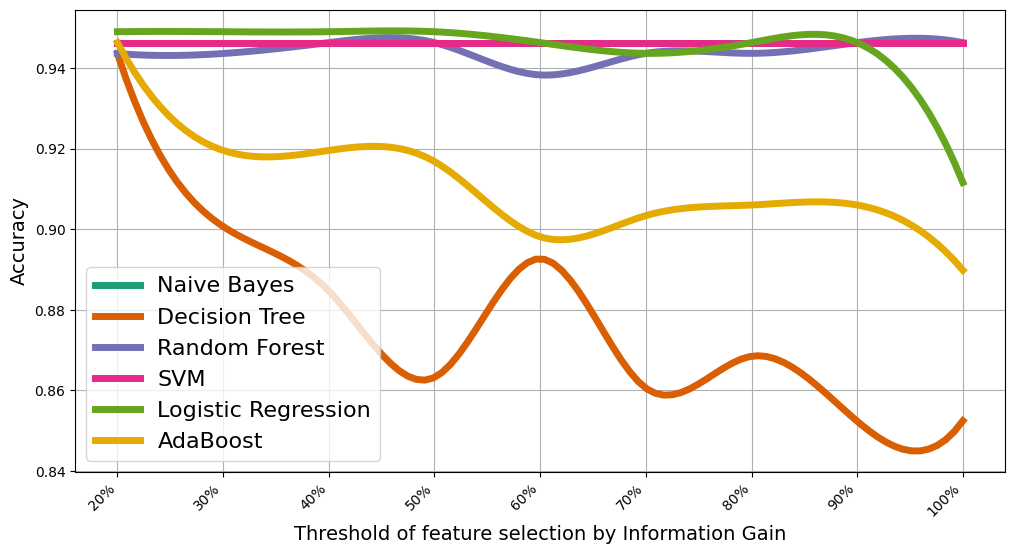

In [83]:
paint_graph(algo_accuracy, 'Accuracy')

<Figure size 640x480 with 0 Axes>

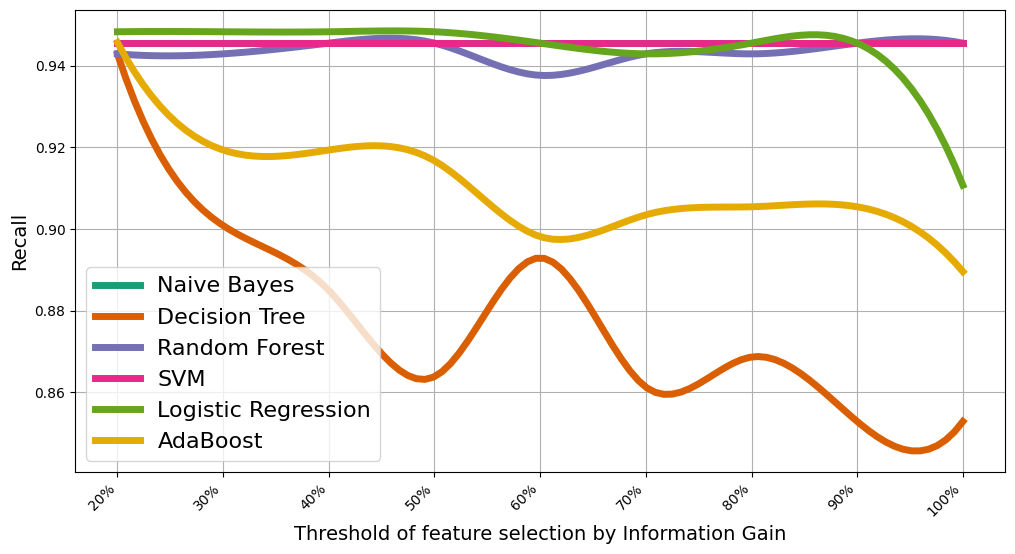

In [86]:
algo_recall = get_graph(1)
paint_graph(algo_recall, 'Recall')

<Figure size 640x480 with 0 Axes>

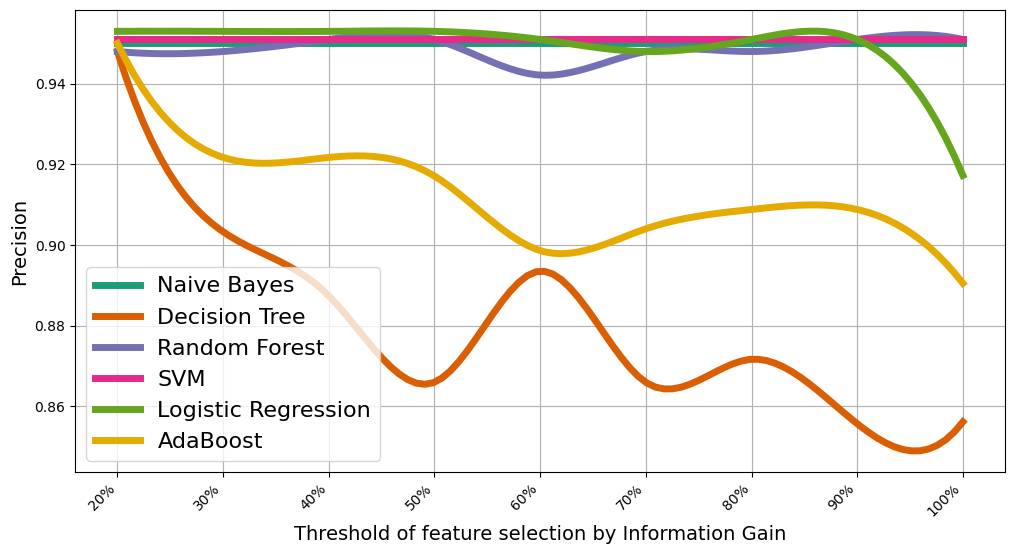

In [87]:
algo_precision = get_graph(2)
paint_graph(algo_precision, 'Precision')

<Figure size 640x480 with 0 Axes>

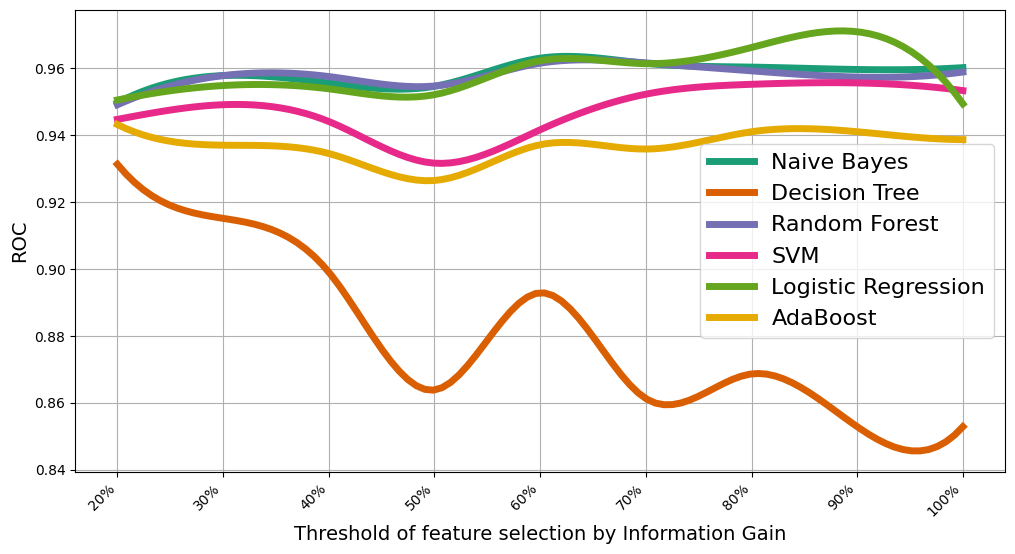

In [88]:
algo_roc = get_graph(3)
paint_graph(algo_roc, 'ROC')

<Figure size 640x480 with 0 Axes>

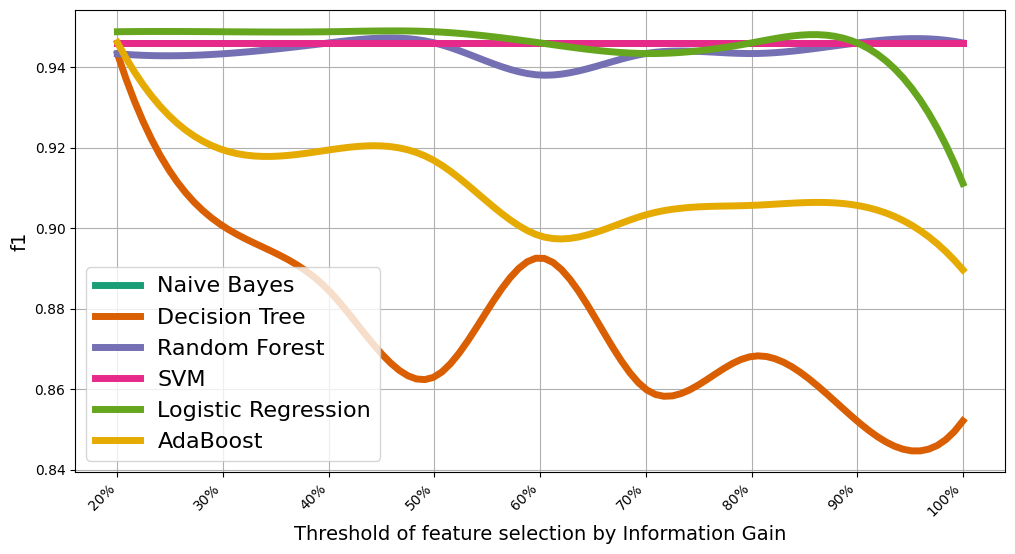

In [89]:
algo_f1 = get_graph(4)
paint_graph(algo_f1, 'f1')